# 4. Redes Neuronales Artificiales

## 4.1 Redes neuronales de una capa

### 4.1.1 Implementación de ADALINE en Python

In [7]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits ()
X, Y = digits .data , digits.target

In [8]:
from sklearn . model_selection import train_test_split
Y[(Y==1)+(Y==2)+(Y==3)+(Y==4)+(Y==5)+(Y==6)+(Y==7)+(Y==8)+(Y==9)] = -1
Y[Y==0] = 1

X_train , X_test , Y_train , Y_test = train_test_split (X,Y, test_size =0.4)

In [9]:
X_train = np.concatenate ([np. ones (( X_train . shape [0],1)), X_train ], axis =1)
X_test = np.concatenate ([np. ones (( X_test . shape [0],1)), X_test ], axis =1)

In [10]:
N_ITER = 30000
lr = 0.0005
n = float ( X_train.shape [0])
w = np.random.randn (65)

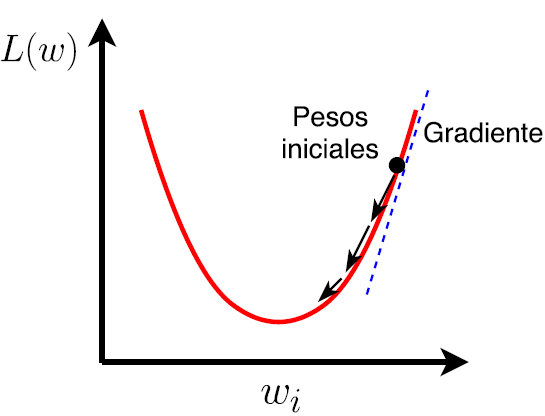

Usaremos gradient descent para optimizar los pesos de nuestra neurona ADALINE. La idea fundamental de esta técnica consiste en calcular las derivadas parciales de la función de error respecto a cada peso para modificarlos el la dirección opuesta, buscando así de forma iterativa un mínimo en la función de error. Recuerda que el valor de una derivada de una función en un punto puede interpretarse como la pendiente de la recta tangencial a la función derivada en ese punto (ver figura).

In [11]:
#Ejecutamos N_ITER iteraciones de gradient descent, con un learning rate (alpha) igual a la variable lr  

for i in range ( N_ITER ):
    z = np.dot( X_train , w)
    gradient = -np.dot (( Y_train - z).ravel () , X_train )/n
    dw = -lr*gradient
    w = w+dw

En cada iteración, calculamos el vector de gradientes y actualizamos los pesos de nuestra neurona en la dirección opuesta:

 $\large \Delta w = -\alpha \cdot \nabla _w L = -\alpha \cdot \left [\frac{\partial L}{\partial w_0}, \cdots, \frac{\partial L}{\partial w_d}\right ]$
 
 donde 
 $\large \frac{\partial L}{\partial w_i} = - \frac{1}{n} \sum_{j=1}^n (y^{(j)}- z(x^{(j)}))~x^{(j)}_i$

 $\large w := w + \Delta w  $

In [12]:
from sklearn . metrics import accuracy_score

y_ = np. sign (np.dot( X_test , w))
print accuracy_score (Y_test , y_) 

0.993045897079


## 4.2 Red multi-clase de una capa

### 4.2.1 Implementación de redes multi-clase de una capa en Python

In [13]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.metrics import accuracy_score
digits = load_digits ()
X, Y = digits .data , digits.target

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split (X,Y, test_size =0.4)
X_train = np.concatenate ([np.ones (( X_train.shape [0],1)), X_train ], axis =1)
X_test = np.concatenate ([np.ones (( X_test.shape [0],1)), X_test ], axis =1)

In [15]:
Y_train_ohe = -np.ones (( Y_train.shape [0], 10))
Y_test_ohe = -np.ones (( Y_test.shape [0], 10))

for i in range ( Y_train.shape [0]):
    Y_train_ohe [i, Y_train [i]] = 1
for i in range ( Y_test.shape [0]):
    Y_test_ohe [i, Y_test [i]] = 1

In [16]:
N_ITER = 50000
lr = 0.00001
n_neurons = 10
n = float ( X_train . shape [0])
W = np. random . randn (65 , n_neurons )/100.

In [17]:
for i in range ( N_ITER ):
    z = np.dot( X_train , W)
    gradient = -np. dot( X_train .T, ( Y_train_ohe -z))/n
    dw = -lr* gradient
    W = W+dw

In [18]:
y = np.dot( X_test , W)

In [19]:
from sklearn . metrics import accuracy_score

y = np. argmax (y, axis =1)
accuracy_score (y, Y_test ) 

0.91376912378303199

## 4.3 El perceptrón Multicapa

### 4.3.1 Perceptrón Multicapa en Keras

In [20]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from sklearn.datasets import load_digits

import numpy as np
data = load_digits()

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1070 (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5005)


In [22]:
X = data ["data"]
Y = data ["target"]

In [23]:
from sklearn . model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split (X,Y, test_size =0.4)
Y_train_ohe = np.zeros (( Y_train.shape [0], 10))
Y_test_ohe = np.zeros (( Y_test.shape [0], 10))

for i in range ( Y_train.shape [0]):
    Y_train_ohe [i, Y_train [i]] = 1
for i in range ( Y_test.shape [0]):
    Y_test_ohe [i, Y_test [i]] = 1

In [24]:
model = Sequential ()

model.add ( Dense (100, input_dim = 64 , activation ="sigmoid"))
model.add ( Dense (10, activation = "softmax"))

In [25]:
model.compile ( loss ="mse",
                optimizer ="sgd",
                metrics =["accuracy"])

In [26]:
model.fit( X_train , Y_train_ohe , nb_epoch =3000 , batch_size =100, verbose=False)

C:\Users\Lope\Anaconda2\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [30]:
print model.summary ()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 7,510
Trainable params: 7,510
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
model.evaluate ( X_test , Y_test_ohe , batch_size =100) # Imprime [0.0069 , 0. 9652 ]

100/719 [===>..........................] - ETA: 0s

[0.010894642962772342, 0.95688455849264198]

## 4.4 El paradigma del aprendizaje profundo

### 4.4.2 Redes neuronales convolucionales profundas en Keras: Reconocimiento de dígitos escritos a mano

In [32]:
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten
from keras.datasets import mnist
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

In [35]:
print K.image_data_format() # Imprime " channels_last "

channels_last


In [72]:
( X_train , Y_train ), (X_test , Y_test ) = mnist.load_data ()
print X_train.shape # Imprime (60000 , 28 , 28)

(60000L, 28L, 28L)


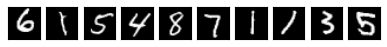

In [43]:
%matplotlib tk

f, axes = plt.subplots (1,10)
for ax in axes.ravel():
    ax.imshow ( X_train [np.random.randint ( 60000 )], cmap ="gray")
    ax.get_xaxis ().set_visible (False)
    ax.get_yaxis ().set_visible (False)
    plt.show()

In [44]:
#X_train = X_train.reshape ( X_train . shape [0], 28 , 28 , 1)
#X_test = X_test.reshape ( X_test . shape [0], 28 , 28 , 1)
#
#from keras.utils import to_categorical
#Y_train_ohe = to_categorical ( Y_train , num_classes =10)
#Y_test_ohe = to_categorical (Y_test , num_classes =10)

In [73]:
X_train = X_train.reshape ( X_train.shape [0], 28 , 28 , 1)/255.
X_test = X_test.reshape ( X_test.shape [0], 28 , 28 , 1)/255.

from keras.utils import to_categorical
Y_train_ohe = to_categorical(Y_train, num_classes=10)
Y_test_ohe = to_categorical(Y_test, num_classes=10)

In [74]:
model = Sequential ()

model.add ( Conv2D (25 , kernel_size =(5,5), padding ="same", activation ="relu", input_shape = (28 ,28 ,1)))
model.add ( MaxPooling2D ( padding ="same"))
model.add ( Conv2D (25 , kernel_size =(3,3), padding ="same", activation ="relu"))
model.add ( MaxPooling2D ( padding ="same"))
model .add ( Flatten ())
model .add ( Dense (400 , activation ="relu"))
model .add ( Dense (10 , activation ="softmax"))

In [75]:
model.compile( loss ="categorical_crossentropy", optimizer ="RMSprop", metrics=["accuracy"])

print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 25)        650       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 25)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 25)        5650      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 25)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1225)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 400)               490400    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                4010      
Total para

In [76]:
model.fit ( X_train , Y_train_ohe , nb_epoch= 5 , batch_size =100)

Epoch 1/5
60000/60000 [==============================] - 7s - loss: 0.1655 - acc: 0.9493     
Epoch 2/5
60000/60000 [==============================] - 7s - loss: 0.0456 - acc: 0.9858     
Epoch 3/5
60000/60000 [==============================] - 7s - loss: 0.0309 - acc: 0.9907     
Epoch 4/5
60000/60000 [==============================] - 7s - loss: 0.0226 - acc: 0.9929     
Epoch 5/5
60000/60000 [==============================] - 7s - loss: 0.0181 - acc: 0.9943     


In [77]:
model.evaluate (X_test , Y_test_ohe ) # Imprime [0.0671 , 0. 9808 ]


 8672/10000 [=========================>....] - ETA: 0s

[0.028409109714747683, 0.99080000000000001]

### 4.4.3 Redes neuronales convolucionales profundas en Keras: Reconocimiento de objetos en imágenes a color

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.datasets import cifar10
import keras.backend as K

import matplotlib.pyplot as plt
import numpy as np

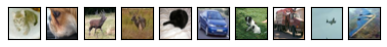

In [79]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

f, axes = plt.subplots(1,10)

for ax in axes.ravel():
    ax.imshow(X_train[np.random.randint(50000)])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()

In [85]:
from keras.utils import to_categorical

X_train = X_train/255.
X_test = X_test/255.

Y_train_ohe = to_categorical(Y_train, num_classes=10)
Y_test_ohe = to_categorical(Y_test, num_classes=10)

In [91]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation="relu",  input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [92]:
model.compile( loss ="categorical_crossentropy", optimizer ="RMSprop", metrics=["accuracy"])

In [93]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [94]:
model.fit ( X_train , Y_train_ohe , nb_epoch= 10 , batch_size =100)

Epoch 1/10
50000/50000 [==============================] - 16s - loss: 1.7092 - acc: 0.3834    
Epoch 2/10
50000/50000 [==============================] - 16s - loss: 1.2517 - acc: 0.5586    
Epoch 3/10
50000/50000 [==============================] - 17s - loss: 1.0577 - acc: 0.6299    
Epoch 4/10
50000/50000 [==============================] - 16s - loss: 0.9308 - acc: 0.6763    
Epoch 5/10
50000/50000 [==============================] - 16s - loss: 0.8521 - acc: 0.7043    
Epoch 6/10
50000/50000 [==============================] - 16s - loss: 0.7920 - acc: 0.7261    
Epoch 7/10
50000/50000 [==============================] - 17s - loss: 0.7498 - acc: 0.7396    
Epoch 8/10
50000/50000 [==============================] - 16s - loss: 0.7159 - acc: 0.7556    
Epoch 9/10
50000/50000 [==============================] - 16s - loss: 0.6905 - acc: 0.7628    
Epoch 10/10
50000/50000 [==============================] - 16s - loss: 0.6693 - acc: 0.7733    


In [95]:
print model.evaluate(X_test, Y_test_ohe) #Imprime [0.68015, 0.7848]

 9888/10000 [============================>.] - ETA: 0s[0.67277756590843196, 0.77559999999999996]


(1L, 32L, 32L, 32L)


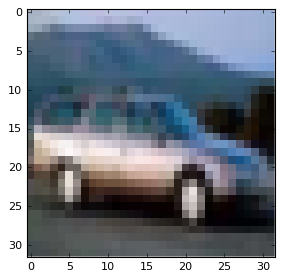

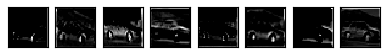

In [96]:
def get_activations(model, layer_idx, X_batch):
    from keras import backend as K
    
    inp = model.input                                          
    outputs = [layer.output for layer in model.layers]          
    functors = [K.function([inp]+ [K.learning_phase()], [out]) for out in outputs]  

    return functors[layer_idx]((X_batch, 1.))[0]

fmaps = get_activations(model, 0, X_train[4:5])

plt.imshow(X_train[4], interpolation="None")
plt.show()

print fmaps.shape #Imprime (1L, 32L, 32L, 32L)

f, axes = plt.subplots(1,8)
i = 0

for ax in axes.ravel():
        
    ax.imshow(fmaps[0,:,:,i], cmap="gray", interpolation="None")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    i = i+1
    
plt.show()

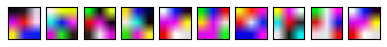

In [110]:
f, axes = plt.subplots(1,10)

for ax in axes.ravel():
    ax.imshow(model.layers[0].get_weights()[0][:,:,:, np.random.randint(32)])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()